# Inference Notebook for the holdout dataset -Phishing Attack Prediction-

    Import libraries

In [24]:
#Model management
import joblib
#Data processing
import numpy as np
import pandas as pd
#Model metrics
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Visualization
import matplotlib
import matplotlib.pyplot as plt

    Reading HoldOut Dataset

In [25]:
df_holdout = pd.read_csv('My_HoldOut_dataset.csv')
df_holdout.head()

,IT Touchpoints,behaviorPattern3,behaviorPattern4,EmployeeTargetedOverPastYear,behaviorPattern5,peerUsageMetric4,peerUsageMetric6,usageMetric2,fraudTraining Completed,usageMetric3,usageMetric5
0,2,2,5,1,4,3,0,2,1,0,2
1,0,3,1,0,3,1,1,2,0,2,2
2,0,0,1,1,6,2,0,3,1,0,1
3,6,0,5,1,0,3,1,3,0,1,1
4,0,0,2,1,1,4,1,0,0,0,0


    Analyzing and adjusting according to the expected model input data

In [26]:
df_holdout.shape

(10, 11)

    Rearrange columns

In [27]:
df_holdout = df_holdout[['EmployeeTargetedOverPastYear','IT Touchpoints','behaviorPattern3','behaviorPattern4','behaviorPattern5','fraudTraining Completed',"peerUsageMetric4","peerUsageMetric6","usageMetric2", "usageMetric3", "usageMetric5"]]
df_holdout.head()

,EmployeeTargetedOverPastYear,IT Touchpoints,behaviorPattern3,behaviorPattern4,behaviorPattern5,fraudTraining Completed,peerUsageMetric4,peerUsageMetric6,usageMetric2,usageMetric3,usageMetric5
0,1,2,2,5,4,1,3,0,2,0,2
1,0,0,3,1,3,0,1,1,2,2,2
2,1,0,0,1,6,1,2,0,3,0,1
3,1,6,0,5,0,0,3,1,3,1,1
4,1,0,0,2,1,0,4,1,0,0,0


    Separating Inference freatures from known label

In [28]:
inferencefeatures = ['IT Touchpoints','behaviorPattern3','behaviorPattern4','behaviorPattern5','fraudTraining Completed',"peerUsageMetric4","peerUsageMetric6","usageMetric2", "usageMetric3", "usageMetric5"]
inferencelabel = 'EmployeeTargetedOverPastYear'
X_inf, y_inf = df_holdout[inferencefeatures].values, df_holdout[inferencelabel].values

for n in range(0,5):
    print("Employee", str(n+1), "\n  Features:",list(X_inf[n]), "\n  Label:", y_inf[n])

Employee 1 
  Features: [2, 2, 5, 4, 1, 3, 0, 2, 0, 2] 
  Label: 1
Employee 2 
  Features: [0, 3, 1, 3, 0, 1, 1, 2, 2, 2] 
  Label: 0
Employee 3 
  Features: [0, 0, 1, 6, 1, 2, 0, 3, 0, 1] 
  Label: 1
Employee 4 
  Features: [6, 0, 5, 0, 0, 3, 1, 3, 1, 1] 
  Label: 1
Employee 5 
  Features: [0, 0, 2, 1, 0, 4, 1, 0, 0, 0] 
  Label: 1


    Inferencing with some new observations, we can load the model and use it to predict values for the holout dataset:

In [29]:
# Load the model from the file
model = joblib.load('./PsishingAttackXYZ_RFmodel.pkl')

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
#X_new = np.array([[2,2,5,4,1,3,0,2,0,2],
#                  [0,3,1,3,0,1,1,2,2,2]])
X_new = X_inf
print ('New sample: {}'.format(list(X_new)))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred))

New sample: [array([2, 2, 5, 4, 1, 3, 0, 2, 0, 2]), array([0, 3, 1, 3, 0, 1, 1, 2, 2, 2]), array([0, 0, 1, 6, 1, 2, 0, 3, 0, 1]), array([6, 0, 5, 0, 0, 3, 1, 3, 1, 1]), array([0, 0, 2, 1, 0, 4, 1, 0, 0, 0]), array([0, 3, 3, 5, 0, 3, 1, 1, 1, 0]), array([2, 0, 3, 6, 1, 3, 1, 0, 2, 0]), array([0, 3, 1, 3, 0, 2, 1, 3, 2, 0]), array([0, 2, 5, 6, 1, 3, 0, 0, 1, 1]), array([0, 2, 5, 6, 0, 2, 0, 1, 2, 0])]
Predicted class is [1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


    Reviewing predictions: Putting all together -features, known labels, predicted labels-

In [30]:
df_features = pd.DataFrame(X_new, columns=['IT Touchpoints','behaviorPattern3','behaviorPattern4','behaviorPattern5','fraudTraining Completed',"peerUsageMetric4","peerUsageMetric6","usageMetric2", "usageMetric3", "usageMetric5"])
#df_features.head()

In [31]:
df_Knowlabels = pd.DataFrame(y_inf, columns=['EmployeeTargetedOverPastYear'])
#df_Knowlabels.head()

In [32]:
df_predictedlabels = pd.DataFrame(pred, columns=['PredictedEmployeeTargetedOverPastYear'])
#df_predictedlabels.head()

In [33]:
extracted_coldfknowlabels = df_Knowlabels["EmployeeTargetedOverPastYear"]
extracted_coldfpredictedvalues = df_predictedlabels["PredictedEmployeeTargetedOverPastYear"]
  
df_features = df_features.join(extracted_coldfknowlabels)
df_features = df_features.join(extracted_coldfpredictedvalues)
df_features.head()

,IT Touchpoints,behaviorPattern3,behaviorPattern4,behaviorPattern5,fraudTraining Completed,peerUsageMetric4,peerUsageMetric6,usageMetric2,usageMetric3,usageMetric5,EmployeeTargetedOverPastYear,PredictedEmployeeTargetedOverPastYear
0,2,2,5,4,1,3,0,2,0,2,1,1.0
1,0,3,1,3,0,1,1,2,2,2,0,0.0
2,0,0,1,6,1,2,0,3,0,1,1,1.0
3,6,0,5,0,0,3,1,3,1,1,1,1.0
4,0,0,2,1,0,4,1,0,0,0,1,1.0


    Evaluating model performance for the inference

Confusion Matrix:
 [[1 0]
 [0 9]] 

Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0

AUC: 1.0


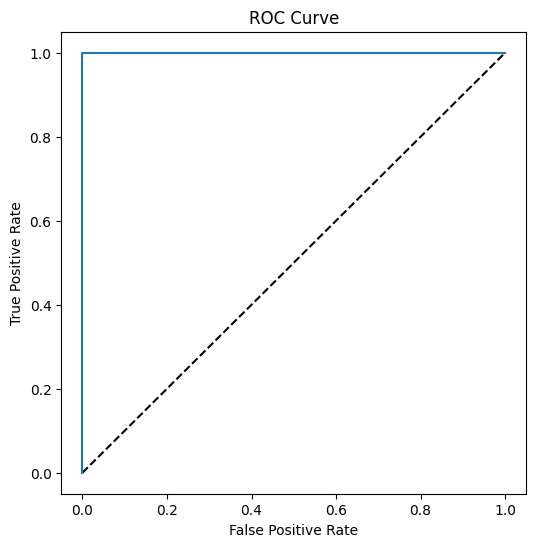

In [34]:
predictionsinf = pred
y_scores = model.predict_proba(X_new)
cm = confusion_matrix(y_inf, predictionsinf)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_inf, predictionsinf))
print("Overall Precision:",precision_score(y_inf, predictionsinf))
print("Overall Recall:",recall_score(y_inf, predictionsinf))
auc = roc_auc_score(y_inf,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_inf, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

    Just a snippet to test the WS endpoint Rest Full

In [ ]:
#Input Data to test the WS Rest Full
#{
#  "data": [[0,3,1,3,0,1,1,2,2,2],
#           [2,2,5,4,1,3,0,2,0,2]],
#  "method": "predict_proba"
#}

# END OF THE INFERENCE NOTEBOOK